# Hierarchical Clustering

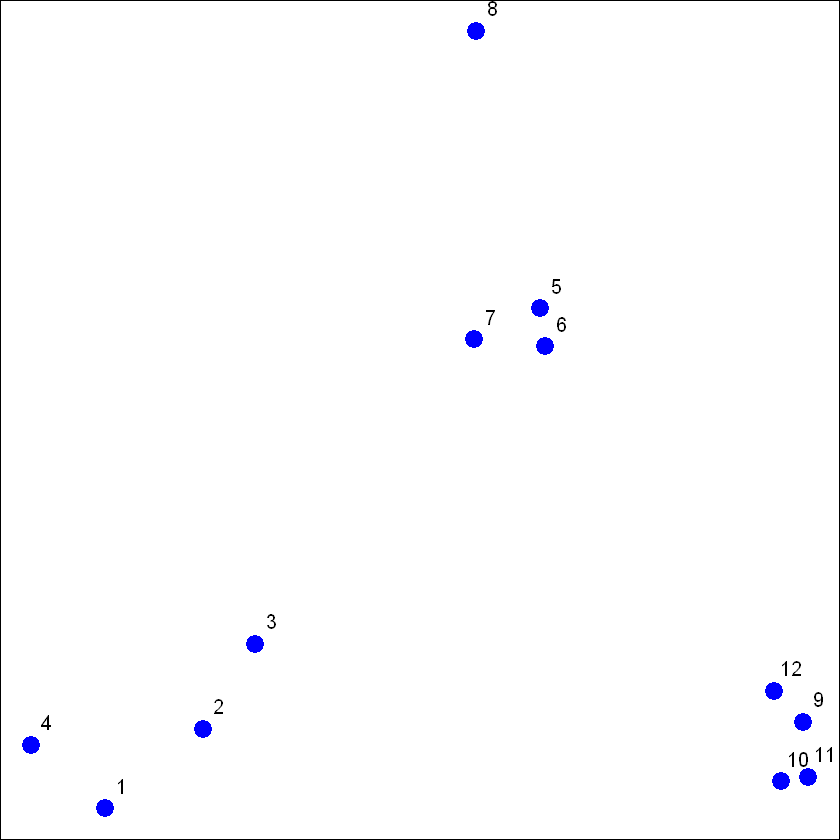

In [5]:
set.seed(1234)
par(mar=c(0,0,0,0))
x <- rnorm(12,mean=rep(1:3,each=4),sd=0.2)
y <- rnorm(12,mean=rep(c(1,2,1),each=4),sd=0.2)
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=as.character(1:12))

# dist

In [6]:
dataFrame <- data.frame(x=x,y=y)
dist(dataFrame)

            1          2          3          4          5          6          7
2  0.34120511                                                                  
3  0.57493739 0.24102750                                                       
4  0.26381786 0.52578819 0.71861759                                            
5  1.69424700 1.35818182 1.11952883 1.80666768                                 
6  1.65812902 1.31960442 1.08338841 1.78081321 0.08150268                      
7  1.49823399 1.16620981 0.92568723 1.60131659 0.21110433 0.21666557           
8  1.99149025 1.69093111 1.45648906 2.02849490 0.61704200 0.69791931 0.65062566
9  2.13629539 1.83167669 1.67835968 2.35675598 1.18349654 1.11500116 1.28582631
10 2.06419586 1.76999236 1.63109790 2.29239480 1.23847877 1.16550201 1.32063059
11 2.14702468 1.85183204 1.71074417 2.37461984 1.28153948 1.21077373 1.37369662
12 2.05664233 1.74662555 1.58658782 2.27232243 1.07700974 1.00777231 1.17740375
            8          9         10     

## hclust

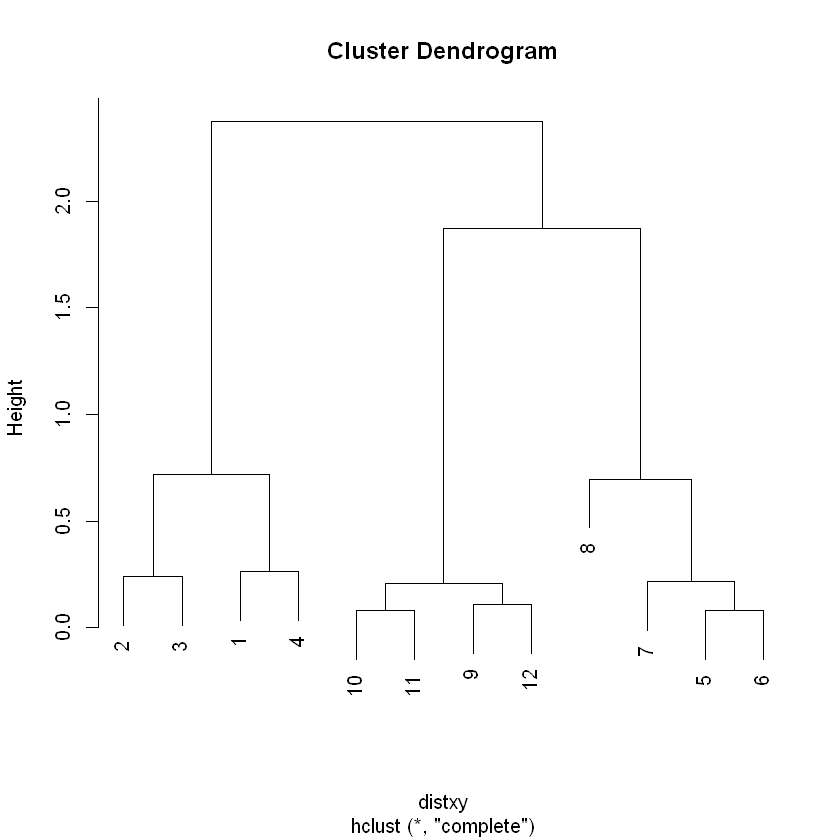

In [9]:
dataFrame <- data.frame(x=x,y=y)
distxy <-dist(dataFrame)
hClustering <- hclust(distxy)
plot(hClustering)

## Pretty dendograms

In [10]:
myplclust <- function( hclust, lab=hclust$labels, lab.col=rep(1,length(hclust$labels)), hang=0.1,...){
 ## modifiction of plclust for plotting hclust objects *in colour*!
 ## Copyright Eva KF Chan 2009
 ## Arguments:
 ##    hclust:    hclust object
 ##    lab:        a character vector of labels of the leaves of the tree
 ##    lab.col:    colour for the labels; NA=default device foreground colour
 ##    hang:     as in hclust & plclust
 ## Side effect:
 ##    A display of hierarchical cluster with coloured leaf labels.
 y <- rep(hclust$height,2)
 x <- as.numeric(hclust$merge)
 y <- y[which(x<0)]
 x <- x[which(x<0)]
 x <- abs(x)
 y <- y[order(x)]
 x <- x[order(x)]
 plot( hclust, labels=FALSE, hang=hang, ... )
 text( x=x, y=y[hclust$order]-(max(hclust$height)*hang), labels=lab[hclust$order], col=lab.col[hclust$order], srt=90, adj=c(1,0.5), xpd=NA, ... )}

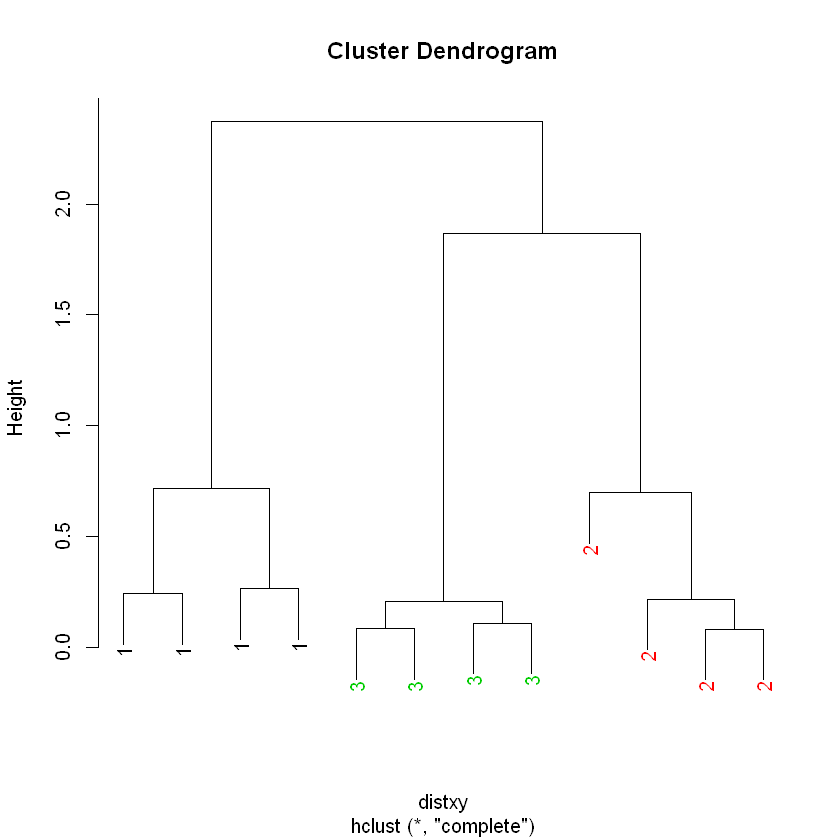

In [11]:
dataFrame <- data.frame(x=x,y=y)
distxy <-dist(dataFrame)
hClustering <- hclust(distxy)
myplclust(hClustering,lab=rep(1:3,each=4),lab.col = rep(1:3,each=4))

## heatmap

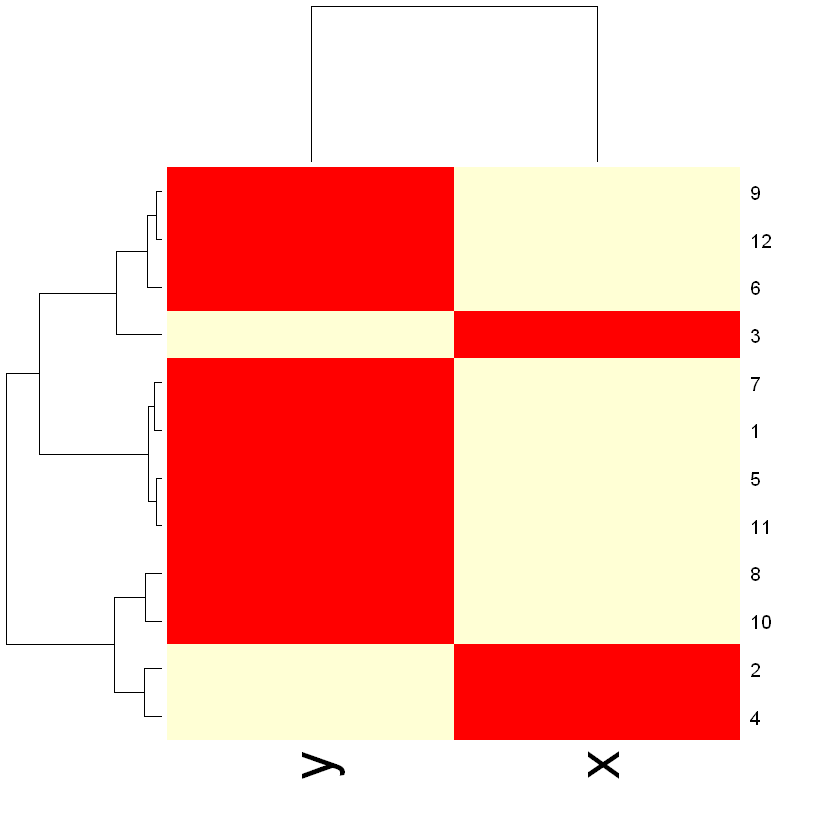

In [12]:
dataFrame <- data.frame(x=x,y=y)
set.seed(143)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
heatmap(dataMatrix)

# K-Means Clustering

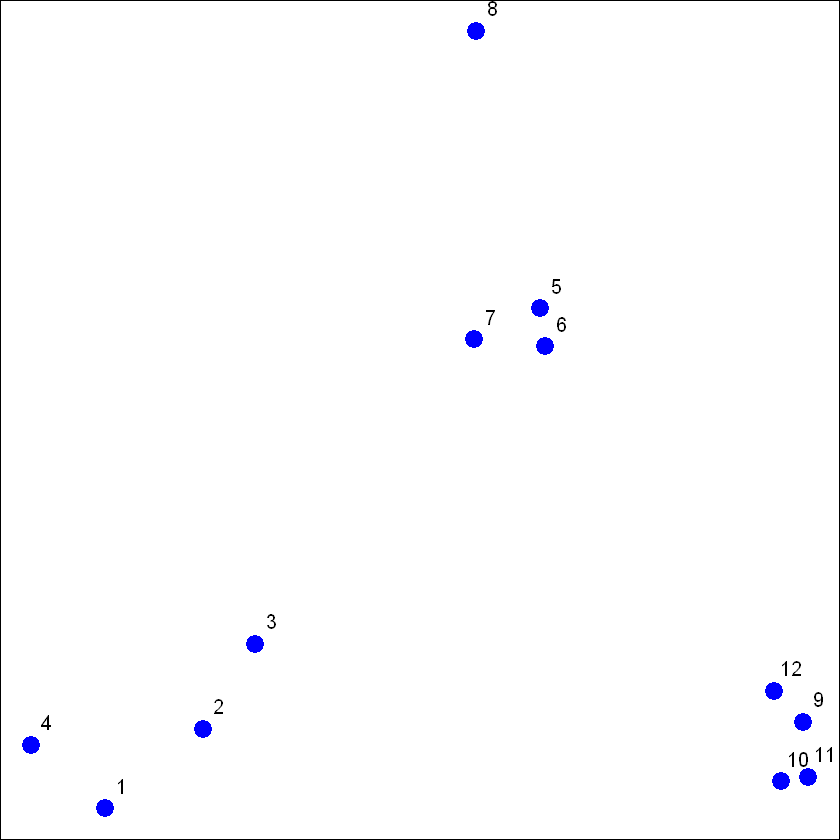

In [13]:
set.seed(1234)
par(mar=c(0,0,0,0))
x <- rnorm(12,mean=rep(1:3,each=4),sd=0.2)
y <- rnorm(12,mean=rep(c(1,2,1),each=4),sd=0.2)
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=as.character(1:12))

## kmeans()

In [14]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [15]:
kmeansObj$cluster

[1] 3 3 3 3 1 1 1 1 2 2 2 2

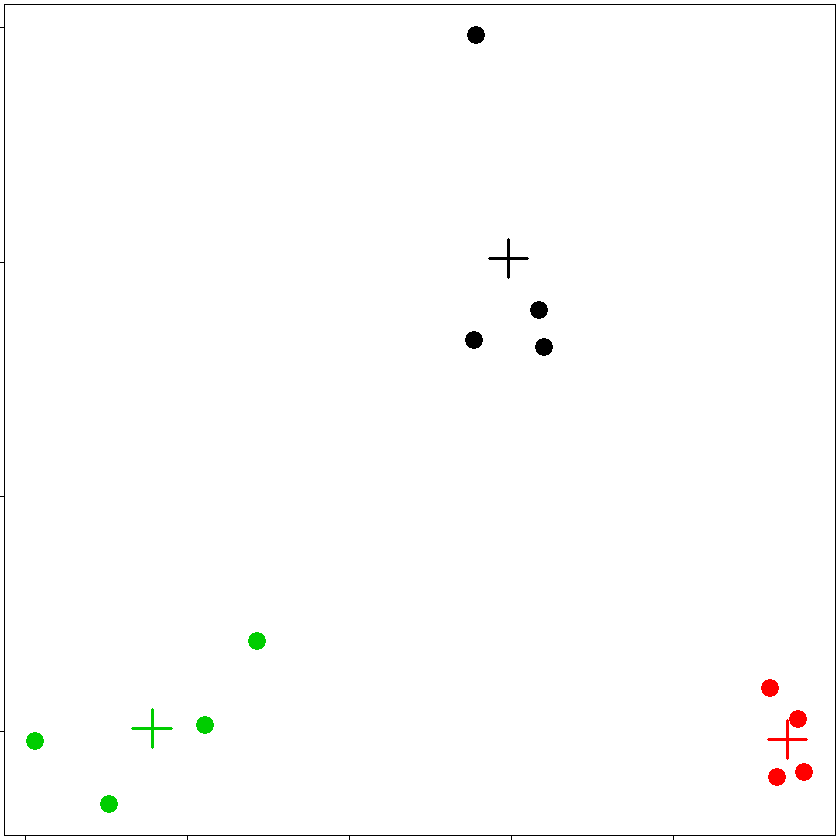

In [19]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

## HeatMaps

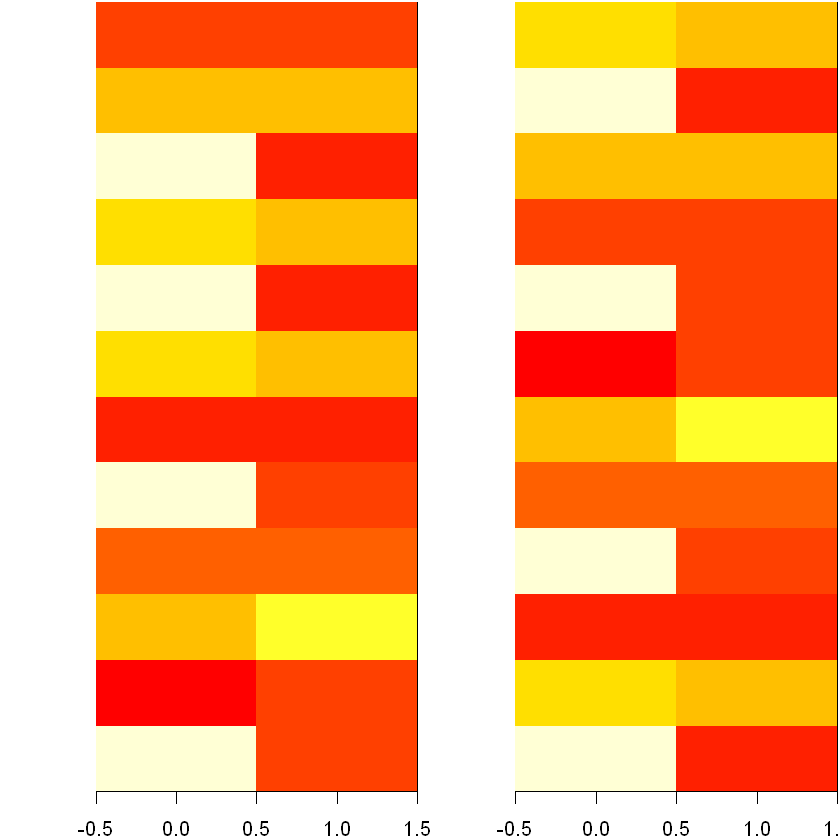

In [20]:
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12), ]
kmeansObj2 <- kmeans(dataMatrix, centers = 3)
par(mfrow = c(1, 2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[, nrow(dataMatrix):1], yaxt = "n")
image(t(dataMatrix)[, order(kmeansObj$cluster)], yaxt = "n")

# Dimension Reduction

## Matrix data

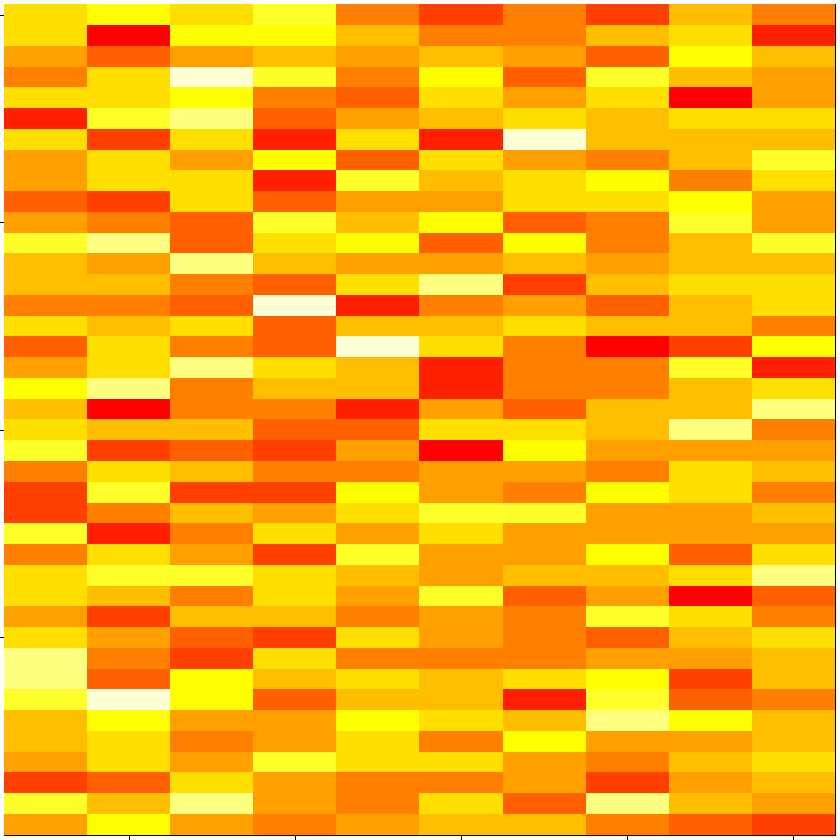

In [21]:
set.seed(12345)
par(mar=rep(0.2,4))
dataMatrix <- matrix(rnorm(400),nrow=40)
image(1:10,1:40,t(dataMatrix)[,nrow(dataMatrix):1])

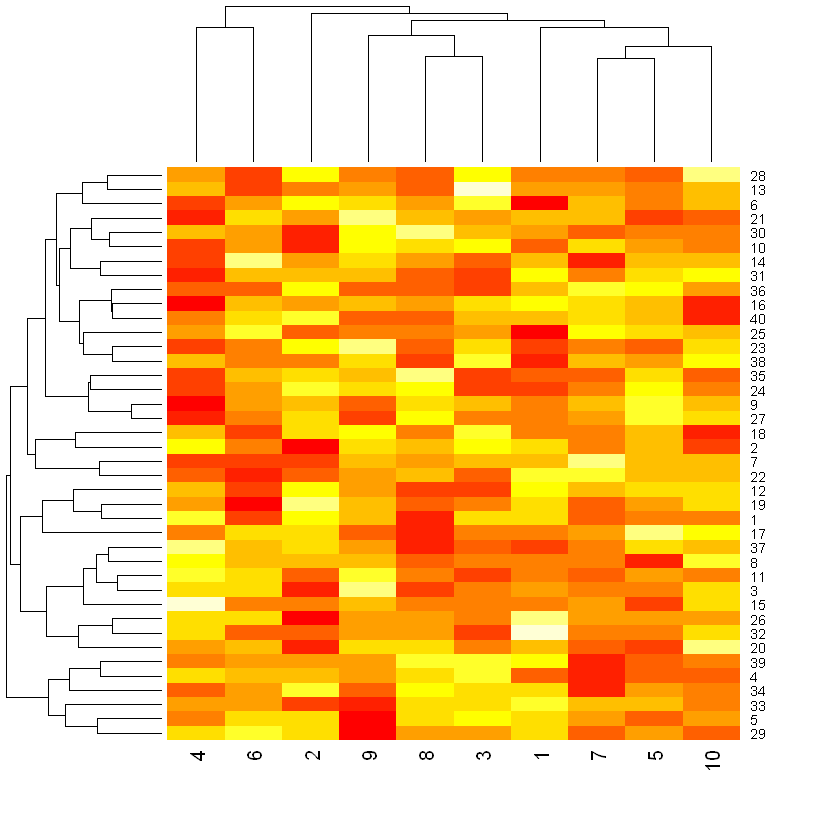

In [22]:
par(mar=rep(0.2,4))
heatmap(dataMatrix)

## Pattern

In [25]:
set.seed(678910)
for (i in 1:40) {
    # flip a coin
    coinFlip <- rbinom(1, size = 1, prob = 0.5)
    # if coin is heads add a common pattern to that row
    if (coinFlip) {
    dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0, 3), each = 5)
    }
}

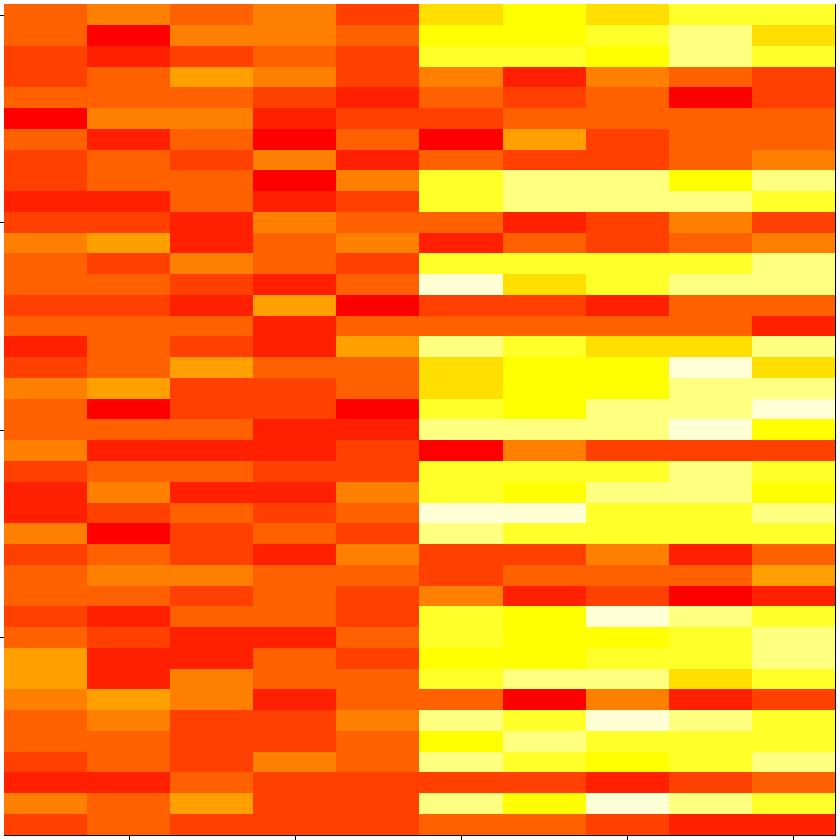

In [26]:
par(mar = rep(0.2, 4))
image(1:10, 1:40, t(dataMatrix)[, nrow(dataMatrix):1])

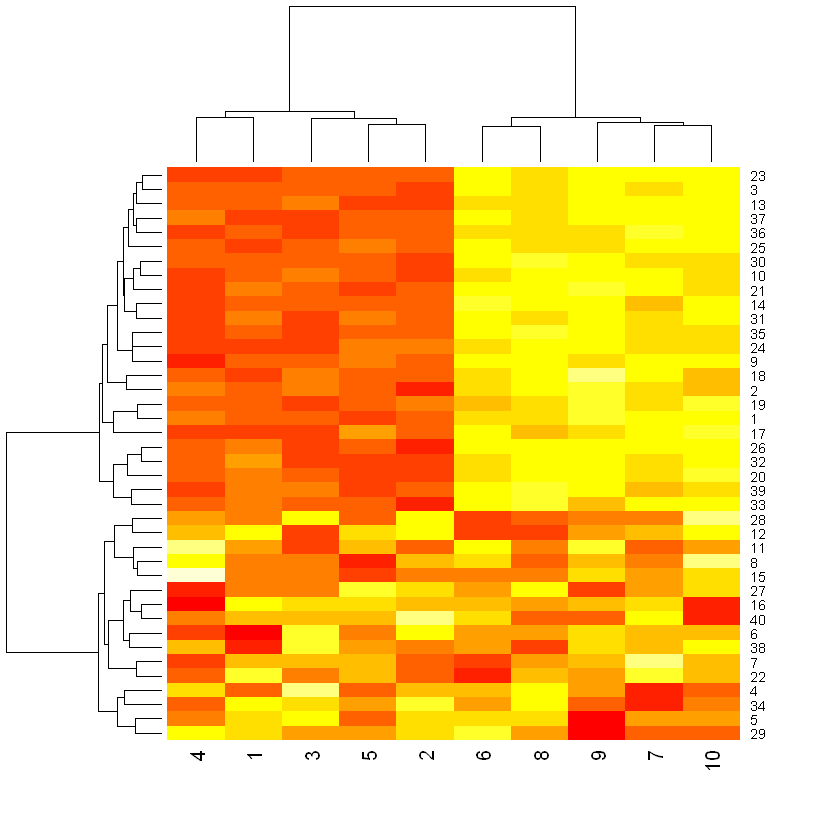

In [27]:
par(mar = rep(0.2, 4))
heatmap(dataMatrix)

## Patterns in rows and columns

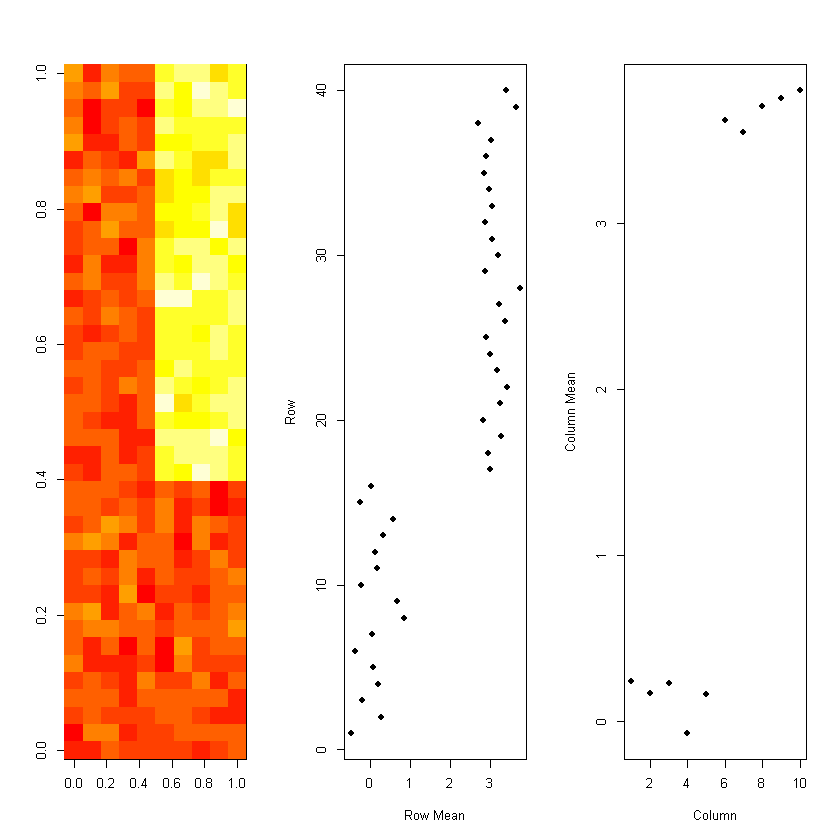

In [34]:
hh <- hclust(dist(dataMatrix))
dataMatrixOrdered <- dataMatrix[hh$order,]
par(mfrow=c(1,3))
image(t(dataMatrixOrdered)[,nrow(dataMatrixOrdered):1])
plot(rowMeans(dataMatrixOrdered),40:1,,xlab = "Row Mean",ylab = "Row",pch=19)
plot(colMeans(dataMatrixOrdered),xlab = "Column",ylab = "Column Mean",pch=19)

# Dimensionality Reduction

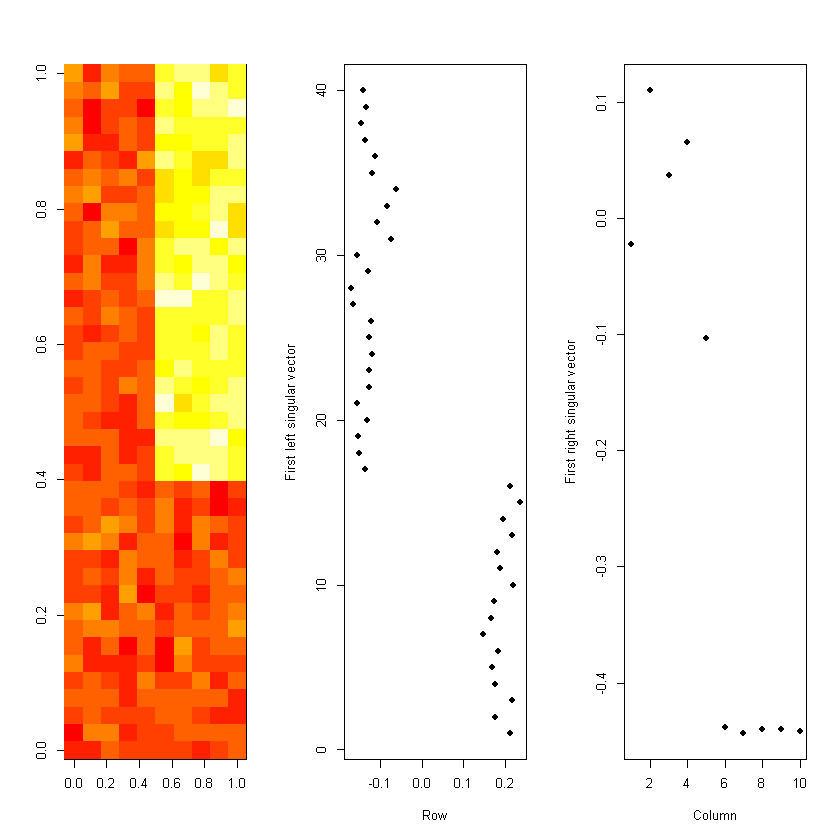

In [40]:
svd1 <- svd(scale(dataMatrixOrdered))
par(mfrow = c(1, 3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1])
plot(svd1$u[, 1], 40:1, , xlab = "Row", ylab = "First left singular vector",
pch = 19)
plot(svd1$v[, 1], xlab = "Column", ylab = "First right singular vector", pch = 19)

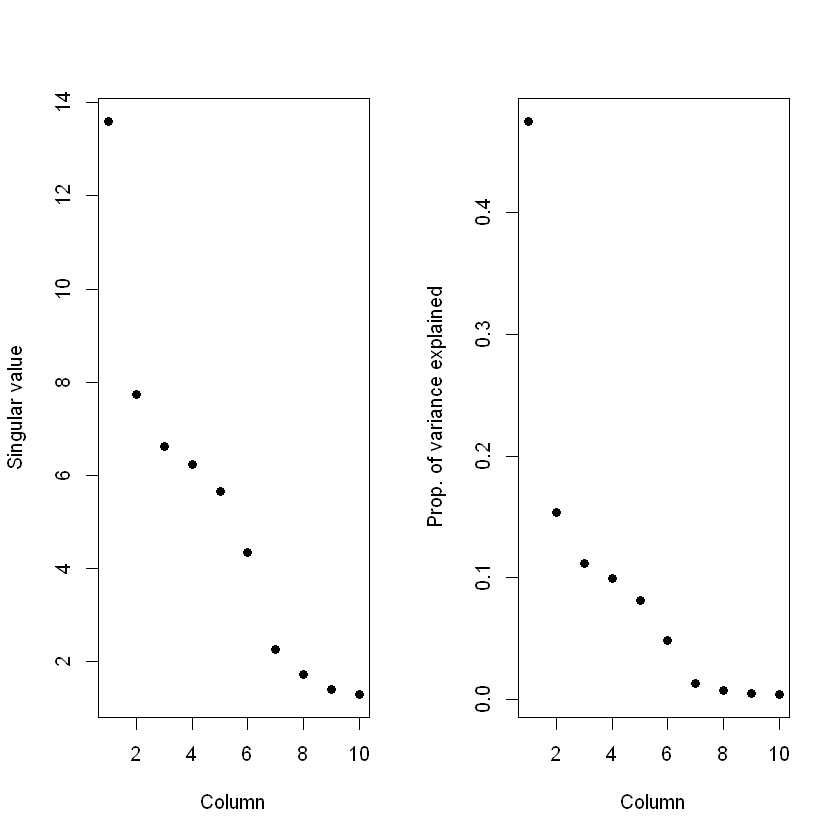

In [41]:
par(mfrow = c(1, 2))
plot(svd1$d, xlab = "Column", ylab = "Singular value", pch = 19)
plot(svd1$d^2/sum(svd1$d^2), xlab = "Column", ylab = "Prop. of variance explained",
pch = 19)

In [44]:
dim(svd1$v)

[1] 10 10

In [45]:
approx <- with(svd1, outer(u[, 1], v[, 1]))

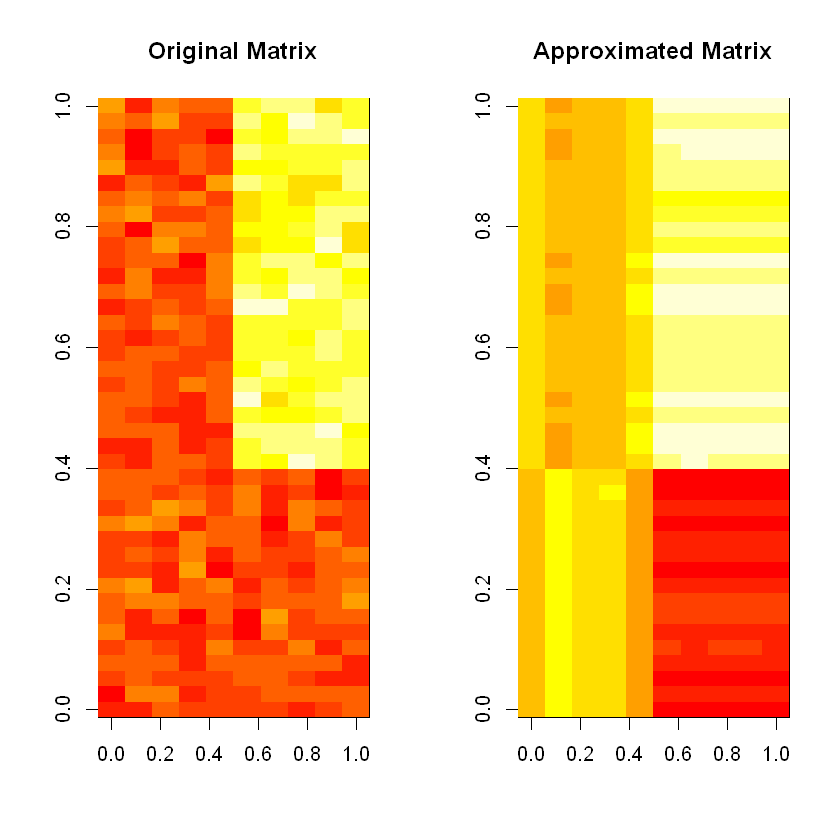

In [47]:
## Plot original data and approximated data
 par(mfrow = c(1, 2))
 image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1], main = "Original Matrix")
 image(t(approx)[, nrow(approx):1], main = "Approximated Matrix")

In [48]:
constantMatrix <- dataMatrixOrdered * 0

for (i in 1:dim(dataMatrixOrdered)[1]) {
 constantMatrix[i, ] <- rep(c(0, 1), each = 5)
 }

# Plotting and Color in R